# Parameters class
example from the documentation

The main model parameters are grouped in the python class parameters, see `openalea.hydroroot.init_parameter.Parameters`. The parameters may be passed to the class by reading a yaml file, see `openalea.hydroroot.init_parameter.Parameters.read_file`.

There are two solvers in HydroRoot project. The first, used for the paper [Boursiac et al. 2022](https://doi.org/10.1093/plphys/kiac281), is a purely water transport model. The second is a solute and water transport model see [Bauget et al. 2023](https://doi.org/10.1093/jxb/erac471). Therefore, the *solute* category in the yaml file has meaning only for the second solver.

<details>
  <summary>click to see an example of parameter.yml file</summary>
    
```yaml
archi:
    #if read_architecture is true then architecture will be constructed from the file(s) given by input_dir and input_file
    #otherwise the architecture will be generated according to the parameters
    read_architecture: True

    #Input architecture from scanned image (distance_from_base_(mm) \t lateral_root_length_(mm) \t order)
    #folder name
    input_dir: data/

    #File name:
    #may be a list of names, eg. [file1, file2, file3] wildcar may be used
    input_file: [Exp03_P2.txt]

    #seed used to generate an MTG, for a same seed we got the same MTG, if no seed is given a seed is generated randomly
    #integer, list of integer or nothing
    seed:

    #file names with length laws relative path
    #file format: "LR_length_mm" ; "relative_distance_to_tip"
    #laws used to generate lateral roots of the 1st order (1_order_law), and lateral roots of order above 1 (2_order_law)
    length_file:
        - data/length_LR_order1_Exp33_20-10-09.csv
        - data/length_LR_order1_Exp33_20-10-09.csv

    #length of the primary root
    #float or list of float
    #unit: m
    primary_length: 0.3

    #branching delay
    #float or list of float
    #unit: m
    branching_delay: 1.07e-3

    #branching variability
    #float between [0 ; 1], 0.25 means 25%
    branching_variability: 0.25

    #maximum roots order
    order_max: 1

    #vertices length
    #unit: m
    segment_length: 1.0e-3

    #part of roots without any lateral root, distance from tip
    #float or list of float
    #unit: m
    nude_length: 0.021

    #reference radius of the primary root
    #float
    #unit: m
    ref_radius: 0.525e-3

    #radius decrease factor applied when increasing order
    #float
    #radius lateral order n: r = order_decrease_factor^n * ref_radius
    order_decrease_factor: 0.36

hydro:
    #radial conductivity
    #float
    #unit: microL/(s.MPa.m2)
    k0: 174.7

    #axial_conductance_data
    #   - [x1, ......, xn]
    #   - [K1, ....., Kn]
    #list of float
    #unit: microL.m/(s.Mpa)
    axial_conductance_data:
        - [0, 0.06, 0.13, 0.18, 0.23, 0.29, 0.43]
        - [2.301E-04, 2.266E-04, 2.230E-02, 2.196E-02, 2.172E-02, 2.577E-02, 1.954E-01]

solute:
    #J_s: active pumping rate
    #float
    #unit: mol/(m2.s)
    J_s: 1.714E-07

    #P_s: permeability coefficient
    #float
    #unit: m/s
    P_s: 6.438E-10

    #Cse: concentration of permeating solutes
    #float
    #unit: mol/m3 or mM
    Cse: 13.96 #13.96 -> pi CTR = -0.034 MPa

    #Ce: concentration of non-permeating solutes
    #float
    #unit: mol/m3 or mM
    Ce: 0.

    #sigma: reflexion coefficient
    #float
    #dimensionless
    Sigma: 0.85 #

experimental:
    #water flux at the root base
    #float
    #unit: microL/s
    Jv: 0.0

    #hydric potential outside the roots (pressure chamber)
    #float
    #unit: MPa
    psi_e: 0.101325

    #hydric potential at the root base (e.g. atmospheric pressure for decapitated plant)
    #float
    #unit: MPa
    psi_base: .101325

output:
    #distance from the base for intercepts calculation
    # float or list of float
    #unit: m
    intercepts: []

    #factor to explore a k0 range
    # float or list of float
    radfold: 1.0

    #like radfold but apply to axial_conductance_data
    axfold: 1.0

    #number of run with the same set of parameters i.e. number of different seeds
    #integer
    #enable only if read_architecture is false
    run_nb: 1
```

</details>

Few parameters may be set to lists allowing to run successive simulations.
For list of number there are two syntax: [x1, ..., xn] or range(start, end, step).
For example, range(0.02, 0.09, 0.02) or [0.02, 0.04, 0.06, 0.08] will give the same results.
The parameter will take successively the values 0.02, 0.04, 0.06 and 0.08.
The parameter *run_nb*  would be useful with read_architecture = False and no given seed to generate different architectures.

**Note:** Parameter is just a python class. It can not be used directly with Hydroroot functions, intermediary script should be used.
We will give you some examples using scripts that be found at https://github.com/openalea/hydroroot in example or doc/examples directories.


In [1]:
from openalea.hydroroot.main import hydroroot_flow, root_builder
from openalea.hydroroot.init_parameter import Parameters
from openalea.hydroroot.read_file import read_archi_data
from openalea.widgets.plantgl import PlantGL # notebook viewer 3D
from openalea.plantgl.algo.view import view # 2D view
from openalea.hydroroot.display import mtg_scene

### Read the yaml file and set the Parameters variables

assuming that the code is run from the example folder

In [2]:
parameter = Parameters()
parameter.read_file('parameters_plant_01.yml')

### Read the architecture file and build the MTG

In [3]:
fname = parameter.archi['input_dir'] + parameter.archi['input_file'][0]
df = read_archi_data(fname)
g, primary_length, total_length, surface, seed = root_builder( primary_length = parameter.archi['primary_length'],
                                                                delta = parameter.archi['branching_delay'],
                                                                nude_length = parameter.archi['nude_length'], 
                                                                df = df,
                                                                segment_length = parameter.archi['segment_length'],
                                                                length_data = parameter.archi['length_data'],
                                                                order_max = parameter.archi['order_max'],
                                                                order_decrease_factor = parameter.archi['order_decrease_factor'],
                                                                ref_radius = parameter.archi['ref_radius'])

### Calculation of the equivalent conductance and the sap flux

In [4]:
g, Keq, Jv = hydroroot_flow(g, segment_length = parameter.archi['segment_length'],
                            psi_e = parameter.exp['psi_e'],
                            psi_base = parameter.exp['psi_base'],
                            axial_conductivity_data = parameter.hydro['axial_conductance_data'],
                            radial_conductivity_data = parameter.hydro['k0'])

In [5]:
result=f"""
primary length (m): {primary_length}
surface (m2): {surface}
total length (m): {total_length}
flux (microL/s): {Jv}
"""
print(result)


primary length (m): 0.10300000000000001
surface (m2): 0.0004625701757655344
total length (m): 1.6260000000000001
flux (microL/s): 0.0028789143185531108



### Display the local water uptake heatmap

to reduce notebook size we use here a 2D view but you can use the openalea.widgets `PlantGL(s)` to display an interactive 3D view

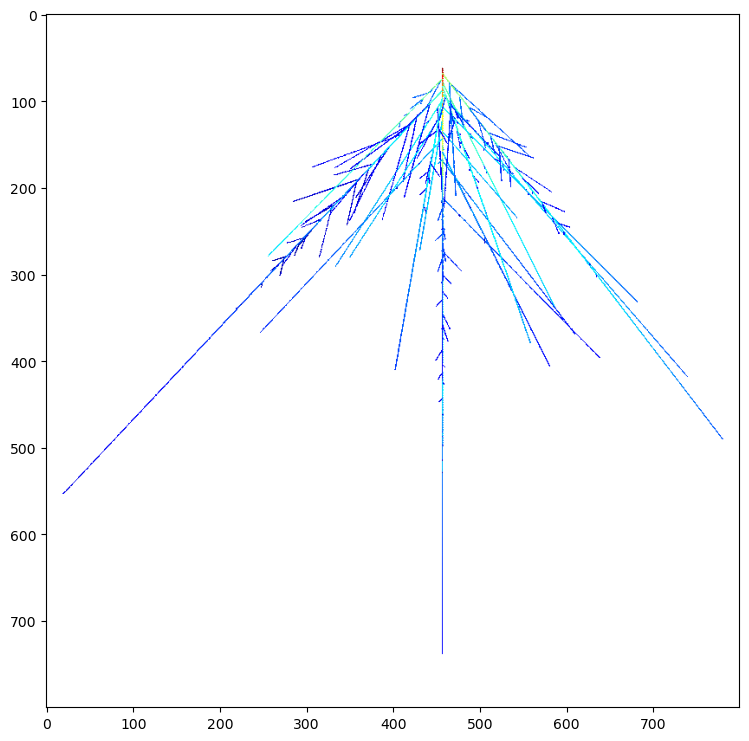

In [6]:
s = mtg_scene(g, prop_cmap = 'j') # create a scene from the mtg with the property j is the radial flux in ul/s
view(s) # use PlantGL(s) to display in 3D

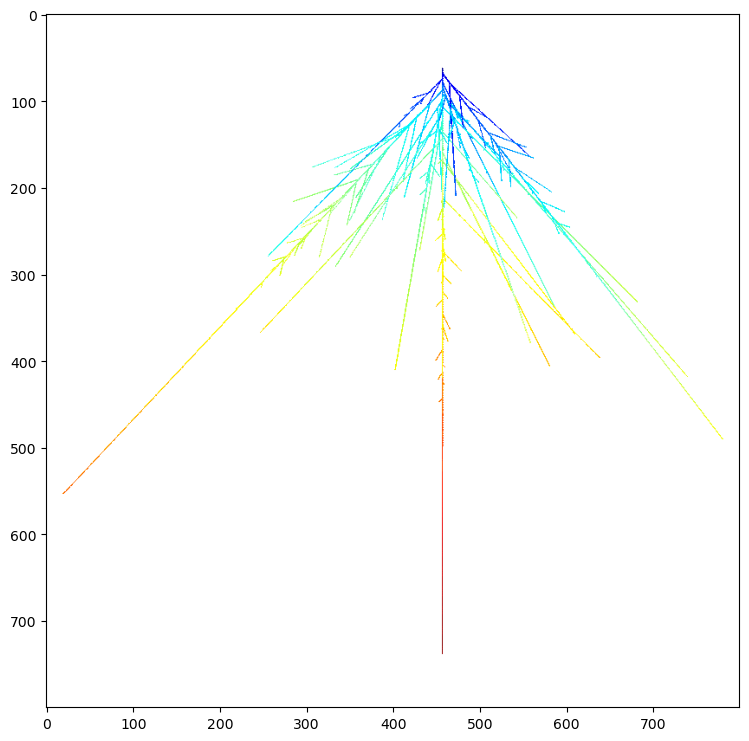

In [7]:
s = mtg_scene(g, prop_cmap = 'psi_in') # create a scene from the mtg with the property psi_in the pressure (MPa) into the xylem vessels
view(s) # use PlantGL(s) to display in 3D